# Un peu de traitement de données et de statistiques avec pandas

Nous allons utiliser des données publiées par l'Insee pour illustrer l'utilisation du paquet `pandas`.

Nous allons travailler sur le recensement de la population française sur plusieurs années. Pour réduire la taille des fichiers, nous allons travailler plus particulièrement sur le fichier **POP1A – Population par sexe et âge regroupé**. Nous allons travailler sur les données des années [2018](https://www.insee.fr/fr/statistiques/5395878), [2019](https://www.insee.fr/fr/statistiques/6456157) et [2020](https://www.insee.fr/fr/statistiques/7631680).

Nous allons d'abord lire les données. Ensuite, nous allons effectuer quelques vérifications sur les données. Enfin, nous montrerons comment répondre facilement à des questions portant sur ces données.

In [1]:
import numpy as np
import pandas as pd

## 1. Lecture des données

La fonction [`pandas.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) permet aussi de lire des données à partir d'une URL (en téléchargeant automatiquement le fichier correspondant), ce qui nécessite une connexion internet :

* Si vous travaillez en local, vous devriez pouvoir exécuter le faire directement.

* **Si vous travaillez sur Onyxia, le téléchargement est bloqué**.
Vous devez télécharger les fichiers et les mettre dans votre espace de travail en les *glissant-déposant*.
Vous pouvez cliquer sur les liens suivants pour télécharger les fichiers : [2018](https://www.insee.fr/fr/statistiques/fichier/5395878/BTT_TD_POP1A_2018.zip), [2019](https://www.insee.fr/fr/statistiques/fichier/6456157/BTT_TD_POP1A_2019.zip), [2020](https://www.insee.fr/fr/statistiques/fichier/7631680/TD_POP1A_2020_csv.zip).
Vous n'avez pas besoin de décompresser les fichiers, la fonction `pandas.read_csv()` pouvant lire des fichiers compressés.
Il faut ensuite donner le (chemin et le) nom du fichier en argument de la fonction [`pandas.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).


In [ ]:
try:
    df_2018 = pd.read_csv(
        'https://www.insee.fr/fr/statistiques/fichier/5395878/BTT_TD_POP1A_2018.zip',
        sep=';', low_memory=False
    )
    df_2019 = pd.read_csv(
        'https://www.insee.fr/fr/statistiques/fichier/6456157/BTT_TD_POP1A_2019.zip',
        sep=';', low_memory=False
    )
    df_2020 = pd.read_csv(
        'https://www.insee.fr/fr/statistiques/fichier/7631680/TD_POP1A_2020_csv.zip',
        sep=';', low_memory=False
    )

except:
    df_2018 = pd.read_csv('BTT_TD_POP1A_2018.zip', sep=';', low_memory=False)
    df_2019 = pd.read_csv('BTT_TD_POP1A_2019.zip', sep=';', low_memory=False)
    df_2020 = pd.read_csv('TD_POP1A_2020_csv.zip', sep=';', low_memory=False)

Affichons un aperçu des données :

In [3]:
df_2018

,NIVGEO,CODGEO,LIBGEO,SEXE,AGEPYR10,NB
0,ARM,13201,Marseille 1er Arrondissement,1,0,825.531203
1,ARM,13201,Marseille 1er Arrondissement,1,3,662.466997
2,ARM,13201,Marseille 1er Arrondissement,1,6,940.259879
3,ARM,13201,Marseille 1er Arrondissement,1,11,1252.984774
4,ARM,13201,Marseille 1er Arrondissement,1,18,2256.054487
...,...,...,...,...,...,...
699855,COM,97424,Cilaos,2,25,494.194190
699856,COM,97424,Cilaos,2,40,608.508276
699857,COM,97424,Cilaos,2,55,299.685545
699858,COM,97424,Cilaos,2,65,316.034176


In [4]:
df_2019

,NIVGEO,CODGEO,LIBGEO,SEXE,AGEPYR10,NB
0,COM,01001,L'Abergement-Clémenciat,1,0,14.812696
1,COM,01001,L'Abergement-Clémenciat,2,0,13.905300
2,COM,01001,L'Abergement-Clémenciat,1,3,10.848150
3,COM,01001,L'Abergement-Clémenciat,2,3,6.856037
4,COM,01001,L'Abergement-Clémenciat,1,6,23.655840
...,...,...,...,...,...,...
680932,COM,97424,Cilaos,2,55,307.112098
680933,COM,97424,Cilaos,1,65,237.039980
680934,COM,97424,Cilaos,2,65,323.877403
680935,COM,97424,Cilaos,1,80,54.350283


In [5]:
df_2020

,NIVGEO,CODGEO,LIBGEO,SEXE,AGEPYR10,NB
0,COM,01001,L'Abergement-Clémenciat,1,0,18.070033
1,COM,01001,L'Abergement-Clémenciat,2,0,13.414280
2,COM,01001,L'Abergement-Clémenciat,1,3,14.402520
3,COM,01001,L'Abergement-Clémenciat,2,3,12.509227
4,COM,01001,L'Abergement-Clémenciat,1,6,34.539704
...,...,...,...,...,...,...
680208,COM,97424,Cilaos,2,55,313.763593
680209,COM,97424,Cilaos,1,65,242.255241
680210,COM,97424,Cilaos,2,65,330.941330
680211,COM,97424,Cilaos,1,80,55.452307


Chaque jeu de données est constitué de 6 colonnes :

* `NIVGEO` correspond au niveau géographique. Deux valeurs sont possibles : `COM` pour commune et `ARM` pour arrondissement.
* `CODGEO` correspond au code géographique. **Attention : le code géographique est le code Insee, qui peut être différent du code postal.**
* `LIBGEO` correspond au libellé géopgraphique.
* `SEXE` correspond au sexe : `1` pour les hommes et `2` pour les femmes.
* `AGEPYR10` correspond à la tranche d'âge. Il y a 10 tranches d'âge :
    * `0` : moins de 3 ans
    * `3` : 3 à 5 ans
    * `6` : 6 à 10 ans
    * `11` : 11 à 17 ans
    * `18` : 18 à 24 ans
    * `25` : 25 à 39 ans
    * `40` : 40 à 54 ans
    * `55` : 55 à 64 ans
    * `65` : 65 à 79 ans
    * `80` : 80 ans ou plus
* `NB` correspond à la taille de la population

## 2. Prétraitement des données

Avant d'analyser les données, effectuons quelques vérifications.

**Question 1 : Y a-t-il des données manquantes ?**

In [6]:
for annee, df in zip((2018, 2019, 2020), (df_2018, df_2019, df_2020)):
    print(f"Année {annee} : {df.isna().any().any()}")

Année 2018 : False
Année 2019 : False
Année 2020 : False


**Question 2 : Remplacez, dans les trois objets `pandas.DataFrame`, les valeurs de la colonne `SEXE` par des chaînes de caractères indiquant explicitement le sexe.**

In [7]:
for df in (df_2018, df_2019, df_2020):
    df['SEXE'] = df['SEXE'].map({1: "Masculin", 2: "Féminin"})

**Question 3 : Remplacez, dans les trois objets `pandas.DataFrame`, les valeurs de la colonne `AGEPYR10` par des chaînes de caractères indiquant la tranche d'âge.** Par exemple, remplacez l'entier `0` par la chaîne de caractères `"0-2"`, l'entier `3` par la chaîne de caractères `"3-5"`, etc.

In [8]:
for df in (df_2018, df_2019, df_2020):
    df['AGEPYR10'] = df['AGEPYR10'].map({
        0: "0-2",
        3: "3-5",
        6: "6-10",
        11: "11-17",
        18: "18-24",
        25: "25-39",
        40: "40-54",
        55: "55-64",
        65: "65-79",
        80: "80+"
    })

[D'après l'Insee, au 1er janvier 2019, la France comptait 66 993 000 habitants](https://www.insee.fr/fr/statistiques/3692693). 

**Question 4 : Quelle est la population en 2019 d'après le jeu de données ?**

In [9]:
print(f"{round(df_2019['NB'].sum()):,}".replace(',', ' '))

70 547 526


L'écart est supérieur à 3 millions, il doit y avoir un problème quelque part...

**Question 5 : Calculez la population à Paris en 2019 en prenant en compte tous les codes géographiques commençant par 75.**

In [10]:
print(
    f"{round(df_2019.loc[df_2019['CODGEO'].apply(lambda x: x.startswith('75')), 'NB'].sum()):,}"
    .replace(',', ' ')
)

4 330 846


**Question 6 : Comparez le nombre obtenu avec le nombre d'habitants à Paris au 1er janvier 2019** (disponible à la première ligne de la Figure 1 sur [cette page](https://www.insee.fr/fr/statistiques/6011965)). **Quelle est la conclusion ?**

In [11]:
2_165_423 * 2 == 4_330_846

True

**Réponse** : La population de Paris a été comptée deux fois.

**Question 7 : Affichez les codes géographiques commençant par 75.** Vous pouvez aller sur [cette page](https://www.insee.fr/fr/metadonnees/geographie/departement/75-paris) pour obtenir la signification des codes géographiques du département de Paris.

In [12]:
df_2019.loc[df_2019['CODGEO'].apply(lambda x: x.startswith('75')), 'CODGEO'].unique()

array(['75056', '75101', '75102', '75103', '75104', '75105', '75106',
       '75107', '75108', '75109', '75110', '75111', '75112', '75113',
       '75114', '75115', '75116', '75117', '75118', '75119', '75120'],
      dtype=object)

**Réponse** : On a les codes géographiques des 20 arrondissements (75101, ..., 75120) mais aussi le code géographique 75056 correspondant à la commune de Paris.

**Question 8 : Comparez la population, par sexe et tranche d'âge, pour (1) la commune de Paris (75056) et (2) l'ensemble des arrondissements de Paris (75101 - 75120).** Effectuez une comparaison visuelle, puis une comparaison informatique avec par exemple la fonction [`numpy.allclose()`](https://numpy.org/doc/stable/reference/generated/numpy.allclose.html).

In [13]:
pd.concat(
    (
        df_2019[
            df_2019['CODGEO'].isin([f'751{i:02d}' for i in range(1, 21)])
        ].groupby(['SEXE', 'AGEPYR10'])['NB'].sum(),
        df_2019[df_2019['CODGEO'] == '75056'].set_index(['SEXE', 'AGEPYR10'])['NB']
    ),
axis=1)

NB             NB
SEXE     AGEPYR10                              
Féminin  0-2        30504.161057   30504.161057
         11-17      67494.133403   67494.133403
         18-24     125983.278364  125983.278364
         25-39     289063.453505  289063.453505
         3-5        28790.631807   28790.631807
         40-54     213090.398572  213090.398572
         55-64     127819.128957  127819.128957
         6-10       47458.664807   47458.664807
         65-79     145240.167853  145240.167853
         80+        71027.194949   71027.194949
Masculin 0-2        32510.018328   32510.018328
         11-17      68773.562765   68773.562765
         18-24     101601.396771  101601.396771
         25-39     272281.504396  272281.504396
         3-5        28890.947185   28890.947185
         40-54     204240.165387  204240.165387
         55-64     110420.086877  110420.086877
         6-10       49321.306575   49321.306575
         65-79     113244.016892  113244.016892
         80+        37668.781548   37668.781548

In [14]:
np.allclose(
    (
        df_2019[
            df_2019['CODGEO'].isin([f'751{i:02d}' for i in range(1, 21)])
        ]
        .groupby(['SEXE', 'AGEPYR10'])['NB'].sum()
    ),
    df_2019[df_2019['CODGEO'] == '75056'].set_index(['SEXE', 'AGEPYR10'])['NB']
)

False

Les deux séries sont donc bien égales et on a compté en double la population de Paris.

**Question 9 : Comparez les niveaux géographiques pour les codes géographiques commençant par 75.**

In [15]:
df_2019.loc[
    df_2019['CODGEO'].apply(lambda x: x.startswith('75')),
    ['NIVGEO', 'CODGEO']
].drop_duplicates()

,NIVGEO,CODGEO
568731,COM,75056
568751,ARM,75101
568771,ARM,75102
568791,ARM,75103
568811,ARM,75104
568831,ARM,75105
568851,ARM,75106
568871,ARM,75107
568891,ARM,75108
568911,ARM,75109


**Réponse** : Pour les arrondissements, la variable `NIVGEO` prend bien la valeur `ARM`, tandis que pour la commune, la variable `NIVGEO` prend la valeur `COM`.

**Question 10 : Déterminez les communes pour lesquelles les données sont disponibles au niveau des arrondissements.**

In [16]:
df_2019.loc[df_2019['NIVGEO'] == 'ARM', 'LIBGEO'].apply(lambda x: x.split(' ')[0]).unique()

array(['Marseille', 'Lyon', 'Paris'], dtype=object)

**Réponse** : On a les informations au niveau des arrondissements pour les villes de Marseille, Lyon et Paris.

**Question 11 : Calculez la population en ne gardant que les observations au niveau des communes. Comparez ce nombre avec [celui de 66 993 000 habitants rapporté par l'Insee](https://www.insee.fr/fr/statistiques/3692693).**

In [17]:
print(f"{round(df_2019.loc[df_2019['NIVGEO'] == 'COM', 'NB'].sum()):,}".replace(',', ' '))

66 988 403


**Réponse** : L'écart est inférieur à 5 000, ce qui est bien plus raisonnable. À noter que les chiffres détaillés pour l'année 2019 ont été publiés en juin 2022, alors que le chiffre de 66 993 000 habitants a été publié en janvier 2019 et est probablement une estimation. L'écart ne semble pas aberrant.

**Question 12 : Par la suite, nous allons travailler au niveau des communes. Supprimez les observations au niveau des arrondissements dans les trois objets `pandas.DataFrame`.**

In [18]:
df_2018 = df_2018.loc[df_2018['NIVGEO'] == 'COM']
df_2019 = df_2019.loc[df_2019['NIVGEO'] == 'COM']
df_2020 = df_2020.loc[df_2020['NIVGEO'] == 'COM']

## 3. Questions diverses

**Question 13 : Quelle est la population de la commune de Paris en 2018 ?**

In [19]:
print(f"{round(df_2018.loc[df_2018['CODGEO'] == '75056', 'NB'].sum()):,}".replace(',', ' '))

2 175 601


**Question 14 : Est-ce que la population de la ville de Paris a diminué entre 2018 et 2020 ?**

In [20]:
(
    df_2020.loc[df_2020['CODGEO'] == '75056', 'NB'].sum()
    <
    df_2018.loc[df_2018['CODGEO'] == '75056', 'NB'].sum()
)

np.True_

**Question 15 : Y avait-il davantage de personnes de sexe féminin que masculin en 2019 en France ?**

In [21]:
df_2019.loc[df_2019['SEXE'] == 2, 'NB'].sum() > df_2019.loc[df_2019['SEXE'] == 1, 'NB'].sum()

np.False_

**Question 16 : Quelle était la tranche d'âge la plus fréquente en France en 2020.**

In [22]:
df_2020.groupby('AGEPYR10')['NB'].sum().idxmax()

'40-54'

**Question 17 : Affichez la distribution des tranches d'âge en France en 2018.**

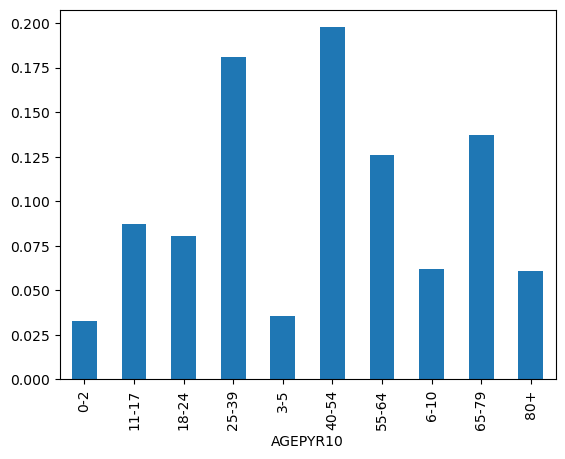

In [23]:
(df_2018.groupby('AGEPYR10')['NB'].sum() / df_2018['NB'].sum()).plot.bar();

**Question 18 : Affichez la distribution des tranches d'âge en France en 2018, 2019 et 2020 sur la même figure, sans passer par `matplotlib`.**

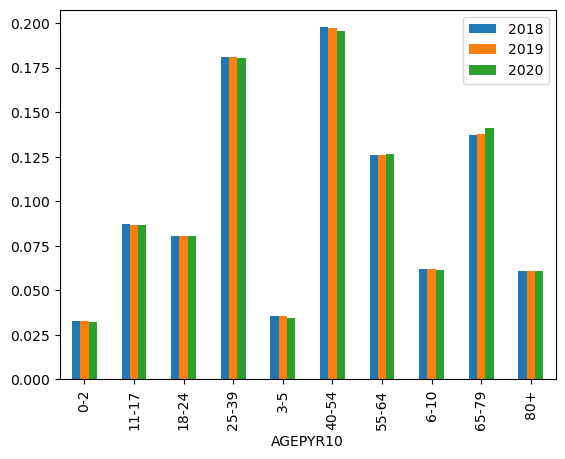

In [24]:
pd.concat(
    (
        (df_2018.groupby('AGEPYR10')['NB'].sum() / df_2018['NB'].sum()).rename("2018"),
        (df_2019.groupby('AGEPYR10')['NB'].sum() / df_2019['NB'].sum()).rename("2019"),
        (df_2020.groupby('AGEPYR10')['NB'].sum() / df_2020['NB'].sum()).rename("2020"),
    ),
    axis=1
).plot.bar();

**Question 19 : Quelle commune avait la population de 80 ans ou plus la plus grande en 2018 ?**

In [25]:
df_2018[df_2018['AGEPYR10'] == '80+'].groupby('LIBGEO')['NB'].sum().idxmax()

'Paris'

**Question 20 : Quelle commune avait, en proportion, la population de 80 ans ou plus la plus grande en 2018 ?**

In [26]:
(
    # Population de 80 ans ou plus par commune
    df_2018[df_2018['AGEPYR10'] == '80+'].groupby('LIBGEO')['NB'].sum()
    /
    # Population par commune
    df_2018.groupby('LIBGEO')['NB'].sum()
).idxmax()

'Bois-Sainte-Marie'

**Question 21 : Quelle était la taille médiane d'une commune française en 2019 ?**

In [27]:
print(f"{round(df_2019.groupby('LIBGEO')['NB'].sum().median()):,}".replace(',', ' '))

496


**Question 22 : Quelles communes faisaient exactement la taille de la taille médiane d'une commune française en 2019 ?**

In [28]:
temp = df_2019.groupby('LIBGEO')['NB'].sum()
print(temp[temp == temp.median()].index)
del temp

Index(['Barbazan', 'Chagnon', 'Gy-en-Sologne', 'La Barde', 'Montagrier',
       'Rezonville-Vionville', 'Roquebrune', 'Sigy-en-Bray', 'Ségry'],
      dtype='object', name='LIBGEO')


**Question 23 : Quel était le pourcentage de mineurs en 2020 ?**

In [29]:
print(
    f"""{df_2020.loc[
        df_2020['AGEPYR10'].isin(['0-2', '3-5', '6-10', '11-17']), 'NB'
    ].sum() / df_2020['NB'].sum():.2%}"""
)

21.50%


**Question 24 : Quelles communes présentes dans la base de données de 2019 sont absentes de la base de données 2018 ?**

In [30]:
np.setdiff1d(df_2019['LIBGEO'].unique(), df_2018['LIBGEO'].unique())

array(['Arrancy-sur-Crusnes', 'Bazoches-et-Saint-Thibaut',
       "L'Aiguillon-la-Presqu'île", 'Labatut-Figuières',
       'Les Monts-Ronds', 'Lignières-Ambleville',
       'Montaignac-sur-Doustre', 'Montgailhard', 'Montgaillard-en-Albret',
       "Pechs-de-l'Espérance", 'Roëzé-sur-Sarthe',
       'Saint-Gérand-Croixanvec', 'Saint-Jean-de-Galaure',
       'Saint-Loup-des-Bois', 'Saugnac-et-Muret', 'Sougeal', 'Targasonne',
       'Thaon-les-Vosges', 'Thury-Harcourt-le-Hom'], dtype=object)